In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Orchids production is determined by sunlight and humidity
- if sunlight is less than 7 hours, production goes down 4% an hour
- is sunlight is more than 7 hours, production goes up 4% an hour
- if humidity is less than 60%, production falls 2% every 5% humidity falls
- if humidity is less more than 80%, production falls 2% every 5% humidity rises

Import and export costs also exist.

Have to consider storage space, or orchids will lose value.

In [123]:
# Initialize dataframes
df1 = pd.read_csv('data/round2/prices_round_2_day_-1.csv', delimiter=';')
df2 = pd.read_csv('data/round2/prices_round_2_day_0.csv', delimiter=';')
df3 = pd.read_csv('data/round2/prices_round_2_day_1.csv', delimiter=';')

# Concatenate DataFrames vertically
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

In [124]:
# print min and max for sunlight and humidity
print("sunlight min: " + str(combined_df['SUNLIGHT'].min()))
print("sunlight max: " + str(combined_df['SUNLIGHT'].max()))

print("humidity min: " + str(combined_df['HUMIDITY'].min()))
print("humidity max: " + str(combined_df['HUMIDITY'].max()))

sunlight min: 1397.3049
sunlight max: 4513.9863
humidity min: 59.99958
humidity max: 97.51327


In [125]:
# new OPI index for sunlight and humidity
def calculate_OPI(sunlight, humidity):
    # Scale sunlight to a range of 0-10
    scaled_sunlight = ((sunlight - 1397) / (4513 - 1397)) * 10

    # Scale humidity to a range of 0-10
    scaled_humidity = (humidity / 100) * 10

    # Calculate sunlight factor
    if scaled_sunlight < 5.83:
        sunlight_factor = -0.04 * (7 - scaled_sunlight)
    else:
        sunlight_factor = 0.04 * (scaled_sunlight - 7)

    # Calculate humidity factor
    if humidity < 6:
        humidity_factor = -0.02 * ((60 - humidity) / 5)
    elif humidity > 8:
        humidity_factor = -0.02 * ((humidity - 80) / 5)
    else:
        humidity_factor = 0

    # Calculate OPI
    OPI = (scaled_sunlight * sunlight_factor) + (scaled_humidity * humidity_factor)

    return OPI

combined_df['OPI'] = combined_df.apply(lambda x: calculate_OPI(x['SUNLIGHT'], x['HUMIDITY']), axis=1)
combined_df['diff_OPI'] = combined_df['OPI'].diff(100)
combined_df['diff_diff_OPI'] = combined_df['diff_OPI'].diff(100)

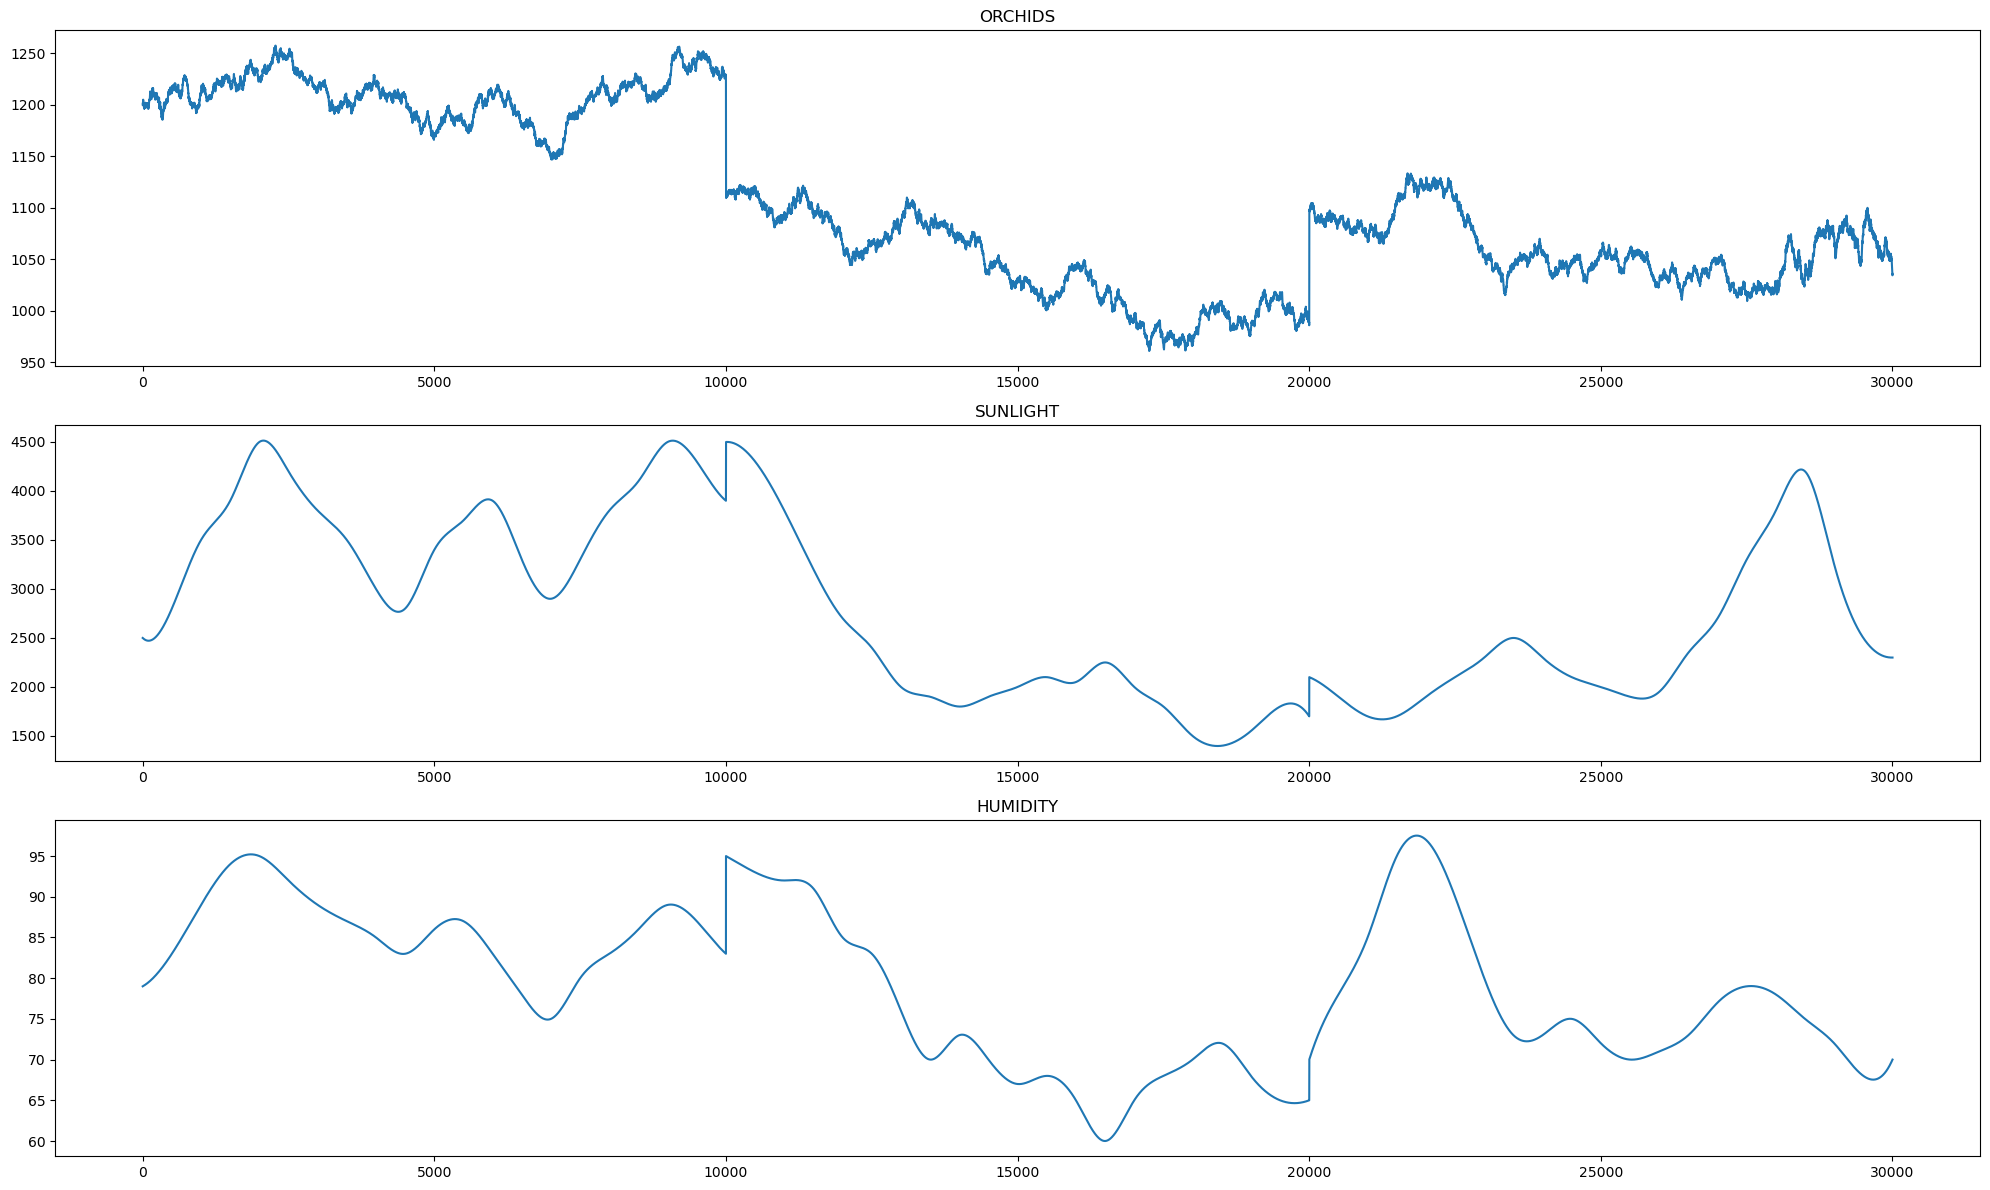

In [126]:
fig, axs = plt.subplots(3, figsize=(20, 12))

axs[0].plot(combined_df['ORCHIDS'])
axs[0].set_title('ORCHIDS')

axs[1].plot(combined_df['SUNLIGHT'])
axs[1].set_title('SUNLIGHT')

axs[2].plot(combined_df['HUMIDITY'])
axs[2].set_title('HUMIDITY')

plt.tight_layout()

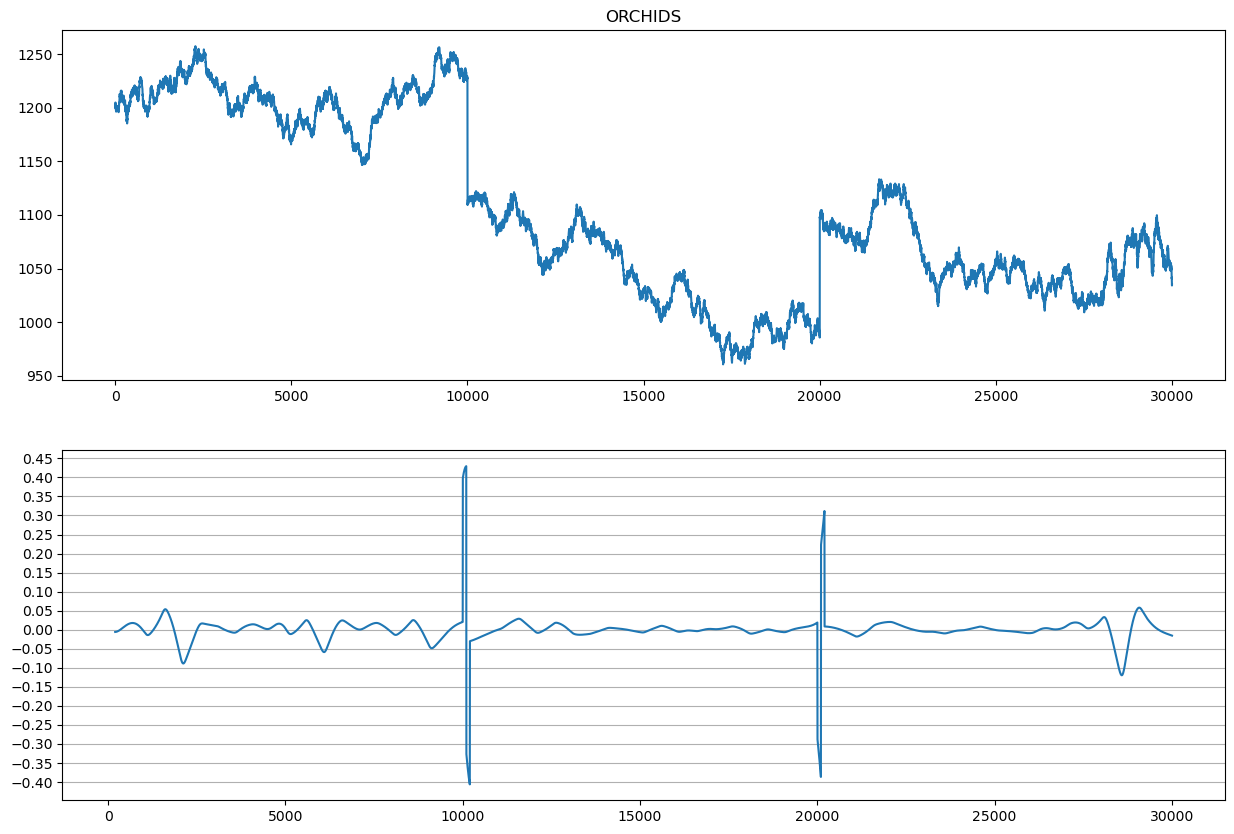

In [128]:
import matplotlib.ticker as ticker

fig, axs = plt.subplots(2, figsize=(15, 10))

axs[0].plot(combined_df['ORCHIDS'])
axs[0].set_title('ORCHIDS')

axs[1].plot(combined_df['diff_diff_OPI'])
axs[1].grid(axis='y')
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(0.05))  # Set y-axis major ticks to appear every 0.05